In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
import seaborn as sns
sns.set_style("white")
import numpy as np 
import pandas as pd 
from scipy import stats, integrate
import matplotlib as mpl
import matplotlib.transforms as mtransforms
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats as st
from sklearn import linear_model
from chapter_2_results.tools import Do_df_from_hdf

# Load the data

In [14]:
 head_filename_result_blocknonans =  'chapter_1_results/head_thorax_data_blk.h5' 
# Load list of bees
head_filename_result = 'chapter_1_results/head_thorax_data.h5'
flight_ids = pd.read_hdf(head_filename_result,key='flight_ids')
##load SNR df
path_template = 'chapter_2_results/snr_{}.hdf'
flight_ids = pd.read_hdf(head_filename_result,key='flight_ids')

In [15]:
DF_traj_head=Do_df_from_hdf(head_filename_result_blocknonans, '/trajectories_filtered/flight_{}/blk_{}','head',flight_ids)
DF_error_head=Do_df_from_hdf(head_filename_result_blocknonans, '/errors_filtered/flight_{}/blk_{}','head',flight_ids)
DF_res_sac_head=Do_df_from_hdf(head_filename_result_blocknonans, '/res_sac/flight_{}/blk_{}','head',flight_ids)
DF_vel_head=Do_df_from_hdf(head_filename_result_blocknonans, '/velocities_filtered/flight_{}/blk_{}','head',flight_ids)

# The Signal to noise ratio analysis

For each intersaccade a signal to noise ratio was calulated in order to disambiguate between a pivoting or a motion parallay startegy. The Signal-to-noise ratio for each strategy compared between the OF as perceived from our experimental data and a theoretical OF if following either active vision strategy: pivoting or motion parallax. Leading to a SNR for the pivoting and a SNR for the motion parallax for each intersaccade. Therefore the signal to noise ratio indicates in the present context how well the perceived optic-flow by the bee correspond to the ideal optic-flow either due to motion-parallax or pivoting-parallax during an intersaccade.The highest from the two SNR is taken to classify an intersacade at either of the two strategies. 

In [16]:
motions = ['nulldrift', 'constantdrift']
snr = dict()
for motion in motions:    
    snr[motion] = pd.read_hdf(path_template.format(motion)).sort_index()
    snr[motion] = snr[motion].xs('intersac', level='mvt')
snr[motion].tail()

Poi                             exit       nest
flight_i blk_i intersac_i                      
17       0     39.0         3.185520   8.973263
               40.0         0.624507   3.116539
               41.0         3.629409  69.588693
         1     1.0          4.389000  22.998473
               2.0         14.844154   6.710647

In [17]:
piv=snr['constantdrift']
print('nest SNR for pivoting')
print('median',piv.nest.median()) 
print('')

piv=snr['constantdrift']
print('exit SNR for pivoting')
print('median',piv.exit.median())


nest SNR for pivoting
median 5.2618321925704565

exit SNR for pivoting
median 2.533893762453996


In [18]:
piv=snr['constantdrift']
print('nest SNR for pivoting')

nest_med_piv=np.log10(piv.nest.median())
print('average log10',np.log10(piv.nest.mean()))

print('median log10',nest_med_piv) 
print('std log10',np.log10(piv.nest.std()))
print('')
piv=snr['constantdrift']
print('exit SNR for pivoting')

exit_med_piv=np.log10(piv.exit.median())
print('average log10',np.log10(piv.exit.mean()))

print('median log10',exit_med_piv) 
print('std log10',np.log10(piv.exit.std()))

nest SNR for pivoting
average log10 1.5321644590248495
median log10 0.7211369936921489
std log10 2.520848610907211

exit SNR for pivoting
average log10 1.4674768194455214
median log10 0.40378840243881964
std log10 2.392019941218996


In [19]:
motion=snr['nulldrift']
print('nest SNR for motion')

print('median',motion.nest.median()) 

print('')
motion=snr['nulldrift']

print('')
print('exit SNR for motion')

print('median',motion.exit.median())

nest SNR for motion
median 3.9003538966686198


exit SNR for motion
median 1.6333675289155105


In [20]:
motion=snr['nulldrift']
print('nest SNR for motion')

nest_med_mot=np.log10(motion.nest.median())

print('average log10',np.log10(motion.nest.mean()))
print('median log10',nest_med_mot) 
print('std log10',np.log10(motion.nest.std()))

motion=snr['nulldrift']

print('')
print('exit SNR for motion')

exit_med_mot=np.log10(motion.exit.median())

print('average log10',np.log10(motion.exit.mean()))
print('median log10',exit_med_mot) 
print('std log10',np.log10(motion.exit.std()))

nest SNR for motion
average log10 2.6189948072314695
median log10 0.5911040143078834
std log10 3.849879112247357

exit SNR for motion
average log10 0.9118286771423303
median log10 0.21308391763365953
std log10 1.6032525417297891


# Pairwise comparison of the SNR during intersaccades: 



/home/bolirev/.virtualenvs/exp-2020/lib/python3.8/site-packages/seaborn/distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/home/bolirev/.virtualenvs/exp-2020/lib/python3.8/site-packages/seaborn/distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/home/bolirev/.virtualenvs/exp-2020/lib/python3.8/site-packages/seaborn/distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/home/bolirev/.virtualenvs/exp-2020/lib/python3.8/site-packages/seaborn/distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future versio

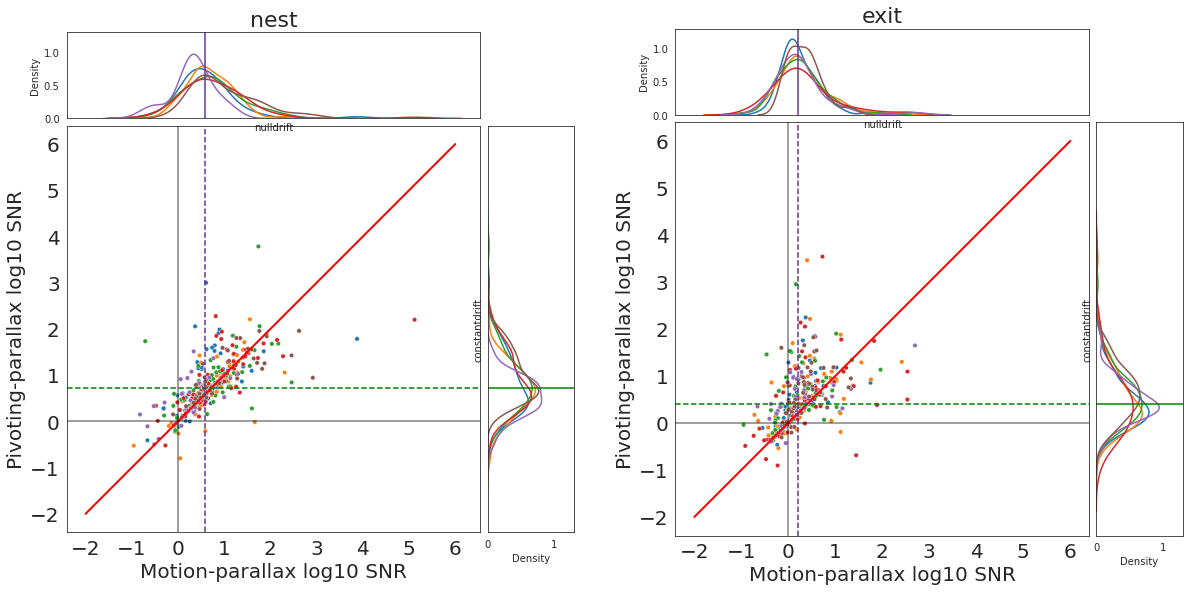

In [21]:


fig,axScatters = plt.subplots(1,2,figsize=(20,10))

for PoI,axScatter in zip(['nest','exit'],axScatters.ravel()):
    
    a=pd.concat([snr['nulldrift'].xs(PoI,axis=1),
                 snr['constantdrift'].xs(PoI,axis=1)],
                 axis=1, keys=['nulldrift','constantdrift']).dropna()

    x,y = a.nulldrift, a.constantdrift
    b=a.reset_index(0)

    b['nulldrift']=np.log10(b['nulldrift'])
    b['constantdrift']=np.log10(b['constantdrift'])
    b.flight_i=b.flight_i.astype(int)
    b=b.reset_index(0,2)
    
    colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b']
   
    sns.scatterplot(x='nulldrift',y='constantdrift',hue='flight_i', palette=colors,legend=None,data=b,s=20,ax=axScatter)
    axScatter.set_ylabel('Pivoting-parallax log10 SNR',fontsize=20)
    axScatter.set_xlabel('Motion-parallax log10 SNR',fontsize=20)
   
    axScatter.set_facecolor('w')
    axScatter.set_aspect(1.)
    axScatter.tick_params(labelsize=20)
    
    divider = make_axes_locatable(axScatter)
    axHistx = divider.append_axes("top", 1.2, pad=0.1, sharex=axScatter)
    axHisty = divider.append_axes("right", 1.2, pad=0.1, sharey=axScatter)

    for flight_id,col in zip(b.flight_i.unique(),colors):
        sns.set_style('white')
        axHistx.grid(False)
        sns.kdeplot(b.loc[b['flight_i']==flight_id, 'nulldrift'], 
                    ax=axHistx, legend=False, color=col)
        sns.kdeplot(b.loc[b['flight_i']==flight_id, 'constantdrift'],  
                    ax=axHisty, vertical=True, legend=False, color=col)
        

    axScatter.plot([-2, 6], [-2, 6], 'r-', lw=2)
    axScatter.axvline(x=0,alpha=0.5,color='k')
    axScatter.axhline(y=0,alpha=0.5,color='k')
    axScatter.set_aspect('equal')
    
    axScatter.xaxis.set_ticks(np.arange(-2, 7, 1))
        
    if PoI=='nest':
        axScatter.axhline(nest_med_piv,color='green',ls='--')
        axScatter.axvline(nest_med_mot,color='rebeccapurple',ls='--')
    else:
        axScatter.axhline(exit_med_piv,color='green',ls='--')
        axScatter.axvline(exit_med_mot,color='rebeccapurple',ls='--')
    
    
    axHistx.xaxis.set_tick_params(labelbottom=False)
    axHisty.yaxis.set_tick_params(labelleft=False)
    if PoI=='nest':
        axHisty.axhline(nest_med_piv,color='green')
        axHistx.axvline(nest_med_mot,color='rebeccapurple')
    else:
        axHisty.axhline(exit_med_piv,color='green')
        axHistx.axvline(exit_med_mot,color='rebeccapurple')
        
        
    axHistx.set_title(PoI,fontsize=22)
    axHistx.set_ylim(0,1.3)
    axHisty.set_xlim(0,1.3)

 


#  Intersacades classified as pivoting based on nest SNR

In [34]:
SNR_mot=snr['nulldrift']
SNR_piv=snr['constantdrift']
inter_piv=dict()
keys = ['05', '06', '07', '08', '11', '17']
inter_piv=pd.DataFrame(index=SNR_mot.index,columns=['classified','drift'])
inter_piv.head()

classified drift
flight_i blk_i intersac_i                 
05       0     0.0               NaN   NaN
               1.0               NaN   NaN
               2.0               NaN   NaN
               4.0               NaN   NaN
               5.0               NaN   NaN

In [42]:
for flight_nb in SNR_mot.index.unique(level='flight_i'):
    for block in SNR_mot.xs((flight_nb),level=('flight_i')).index.unique(level='blk_i'):  
        df_mot=SNR_mot.xs((flight_nb,block),level=('flight_i','blk_i')).nest
        df_piv=SNR_piv.xs((flight_nb,block),level=('flight_i','blk_i')).nest
        i=np.nan
        for i in df_mot.index:
            if i in df_piv.index:
                if df_mot.loc[i]<df_piv.loc[i]:
                        inter_piv.loc[(flight_nb,block,i),'classified']='pivoting'
                else:
                        inter_piv.loc[(flight_nb,block,i),'classified']='motion'
            else:
                continue

In [43]:
percentage_piv_in=(inter_piv.classified=='pivoting').sum()*100/inter_piv.shape[0]
print('percentage of pivoting intersaccade;',percentage_piv_in)

percentage of pivoting intersaccade; 57.59312320916906


# Plot the pivoting points location for pivoting intersacades

In [44]:
for flight_nb in SNR_mot.index.unique(level='flight_i'):

    for block in SNR_mot.xs((flight_nb),level=('flight_i')).index.unique(level='blk_i'):

        data_drift=pd.read_hdf('chapter_2_results/idealmotion.hdf',
                               key= '/trajectories_constantdrift_param/flight_{}/blk_{}'.format(flight_nb,block))
        for i in data_drift.index:
            inter_piv.loc[(flight_nb,block,i),'drift']=data_drift.loc[i].drift


We first need to calculate where are the different pivoting points induced by the drift angle. We do this following : 

\begin{align}
\vec{x}_{\text{pivot}}(i) = D(i) 
\begin{pmatrix}
\cos\tilde{{\alpha}}(i) \\ 
\sin\tilde{{\alpha}}(i)
\end{pmatrix} + \vec{\tilde{x}}_\text{bee}(i)\\
D(i) = \frac{v}{2\tan(\theta(i)/2)}
\end{align}



$\vec{x}_{\text{pivot}}(i)$ is the position of the pivot-point at the i-th intersaccade, $D$ is the distance in space between the bee and the pivot-point, $\theta$ is the drift during the intersaccade. $v$ is the tangeantial speed. The tilde represents the average during the intersaccade. $\alpha$ and $\vec{x}_\text{bee}$ are the yaw angle and position of the bee, respectively. Following the above equation, a drift angle  $\theta$ smaller than 0 will lead to a pivot point in direction of the bee's tail. 

In [45]:
def xy_pivot(yaw,drift,bee_x,bee_y,run_distance,h_piv_list):
    '''find location pivoting in a plan based on drift of the intersaccade'''
    x=run_distance/2
    drift=-drift
    #R is the norm of the gazing vector bee --> pivot point
    R=x/np.sin(0.5*drift)
    #h is the distance of the pivot point at hte heading.
    h_piv=R*np.cos(0.5*drift)
    h_piv_list.append([h_piv,np.rad2deg(drift)])
    #heading of the intersaccade
    heading=yaw.mean()
    heading = np.arctan2(np.sin(heading), np.cos(heading))   
    ##get the x and y of the pivot point
    x_piv= h_piv*np.cos(heading)+bee_x
    y_piv= h_piv*np.sin(heading)+bee_y
    return x_piv,y_piv,h_piv

In [46]:

##save pivot points parameter
pivot_points_df=pd.DataFrame(index=inter_piv.index,columns=['x_piv','y_piv','h_piv','theta'])

for flight_id in flight_ids:
    
    for block in inter_piv.xs((flight_id),level=('flight_i')).index.unique(level='blk_i'):

        key = '/trajectories_filtered/flight_{}/blk_{}'.format(flight_id,block) 
        head_traj = pd.read_hdf(head_filename_result_blocknonans,key).loc[:,'head']
        
        key = '/res_sac/flight_{}/blk_{}'.format(flight_id,block) 
        res_sac_head = pd.read_hdf(head_filename_result_blocknonans,key).loc[:,'head']
        
        intersac_htraj = head_traj.loc[res_sac_head.intersac.dropna().index,:]
        intersac_htraj['id_intersac'] = res_sac_head.intersac.dropna()
        h_piv_list=[]
    
        for (name, group) in intersac_htraj.groupby('id_intersac'):
           
            traj=group['location']
            orient=group['zyx']
            
            start_pos=traj.loc[traj.index.min(),['x','y','z']]
            end_pos=traj.loc[traj.index.max(),['x','y','z']]
            distance=np.sqrt((start_pos.x-end_pos.x)**2+(start_pos.y-end_pos.y)**2+(start_pos.z-end_pos.z)**2)

            ##get the drif of the interssacade
            drift=inter_piv.xs((flight_id,block,name),level=('flight_i','blk_i','sacintersac_i')).drift[0]
            
            if np.isnan(drift)==False:
                beepos=traj.mean()
                yaw=orient.alpha_0
                x_piv,y_piv,h_piv=xy_pivot(yaw,drift,beepos.x,beepos.y,distance,h_piv_list)

                pivot_points_df.loc[flight_id,block,name,'intersac'].x_piv=x_piv
                pivot_points_df.loc[flight_id,block,name,'intersac'].y_piv=y_piv
                pivot_points_df.loc[flight_id,block,name,'intersac'].h_piv=h_piv
                pivot_points_df.loc[flight_id,block,name,'intersac'].theta=np.rad2deg(drift)

KeyError: 'Level sacintersac_i not found'

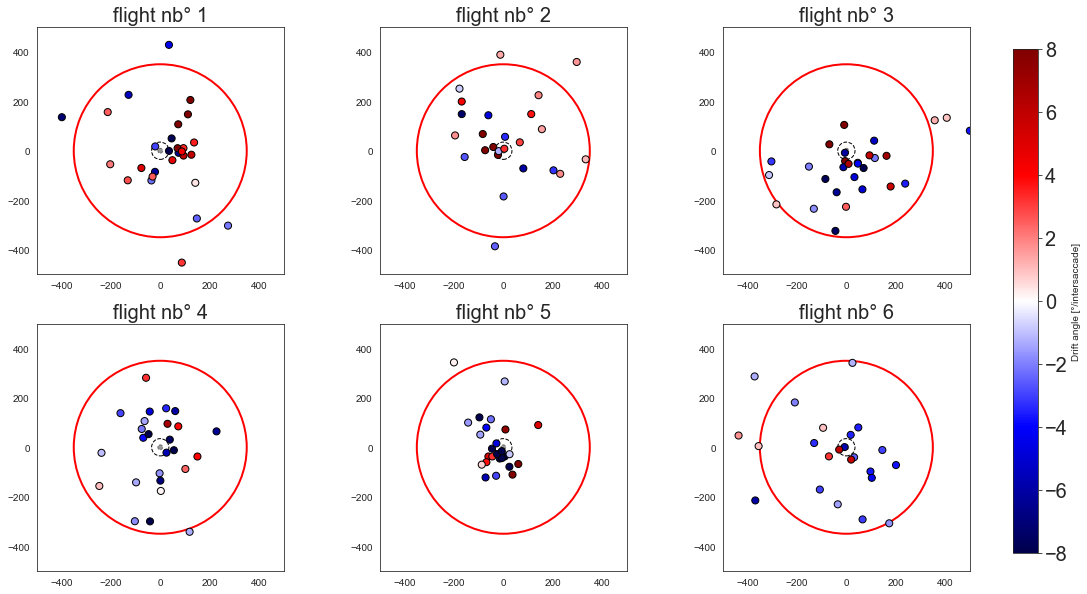

In [24]:


##add the pivot point distance for all intersaccades:
fig,axes=plt.subplots(2,3,figsize=(20,10))

for flight_id,ax in zip(flight_ids,axes.ravel()):
    
    ##get intersacacde classified as pivoting only
    good_index=inter_piv.loc[inter_piv.classified=='pivoting'].index
    res=pivot_points_df.loc[good_index]
    
    scat=ax.scatter(res.loc[flight_id].x_piv,
                    res.loc[flight_id].y_piv,
                    c=res.loc[flight_id].theta,marker='o',
                    s=50,cmap='seismic',edgecolor='k',vmin=-8,vmax=8,zorder=20)## try without the vmin vmax
    

    circle2 = plt.Circle((0, 0), 10, color='k', fill=True,alpha=0.4,linestyle='--')
    ax.add_artist(circle2)
    circle2 = plt.Circle((0, 0), 35, color='k', fill=False,linestyle='--')
    ax.add_artist(circle2)
    circle2 = plt.Circle((0, 0), 350, color='r', fill=False,lw=2)
    ax.add_artist(circle2)

    ax.set_xlim(-500,500)
    ax.set_ylim(-500,500)
    #ax.set_axis_off()
    ax.set_aspect('equal')
    ax.grid(False)
    names_for_publi={'05':1,'06':2,'07':3,'08':4,'11':5,'17':6}
    ax.set_title('flight nb° {}'.format(names_for_publi[flight_id]),fontsize=20)
    divider = make_axes_locatable(ax)

fig.subplots_adjust(right=0.8)

cbar_ax = fig.add_axes([0.8, 0.15, 0.05, 0.7])

cbar_ax.set_aspect(20)
fig.colorbar(scat, cax=cbar_ax,label='Drift angle [°/intersaccade]')
cbar_ax.tick_params(labelsize=20)
cbar_ax.set_label('Drift angle [°]')


In [25]:
##get points behind the bee thus h<0
pts_behind=res[res.h_piv<0].shape[0]
#check if outsde walls
pts_out=res.mask(lambda p: p.x_piv**2+p.y_piv**2 < 350**2).dropna().shape[0]

pts_in=res.mask(lambda p: p.x_piv**2+p.y_piv**2 > 100**2).dropna().shape[0]

nbr_pts=res.shape[0]



percentage_piv_in=pts_in*100/nbr_pts
print('percentage of point around nest ;',percentage_piv_in)


percentage_piv_in=pts_out*100/nbr_pts
print('percentage of point outside wall ;',percentage_piv_in)


percentage_piv_in=pts_behind*100/nbr_pts
print('percentage of point behind bee ;',percentage_piv_in)

percentage of point around nest ; 26.3681592039801
percentage of point outside wall ; 30.845771144278608
percentage of point behind bee ; 44.776119402985074
